# Evaluating Regression Models

In [2]:
#Disable warnings
import warnings
warnings.filterwarnings("ignore")

#General libraries needed
import pandas as pd
import numpy as np

#Libraries for graphing
import matplotlib.pyplot as plt
import seaborn as sns

#sklearn imports
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#Library for statistical testing and mathematics
from scipy import stats
from math import sqrt

#Datasets
from pydataset import data 

## Load Dataset

We will utilize the `tips` dataset.

In [3]:
tips = data('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


## Linear Regression Model

Fit a linear regression model (ordinary least squares) and compute `yhat`, predictions of `tip` using `total_bill`.

### Create a baseline prediction

In [4]:
baseline = tips.tip.mean()
baseline

2.9982786885245902

In [5]:
#baseline is mean of dependent variable
tips['baseline'] = tips.tip.mean()
tips.head()

,total_bill,tip,sex,smoker,day,time,size,baseline
1,16.99,1.01,Female,No,Sun,Dinner,2,2.998279
2,10.34,1.66,Male,No,Sun,Dinner,3,2.998279
3,21.01,3.50,Male,No,Sun,Dinner,3,2.998279
4,23.68,3.31,Male,No,Sun,Dinner,2,2.998279
5,24.59,3.61,Female,No,Sun,Dinner,4,2.998279


### Fit the model

First we will fit the linear regression model (ordinary least squares). 

In [6]:
#Create the model object
lm = LinearRegression(normalize=True)

# fit the model to training data
lm.fit(tips[['total_bill']], tips.tip)

LinearRegression(normalize=True)

### Make prediction

In [7]:
tips['yhat'] = lm.predict(tips[['total_bill']])

tips.head()

,total_bill,tip,sex,smoker,day,time,size,baseline,yhat
1,16.99,1.01,Female,No,Sun,Dinner,2,2.998279,2.704636
2,10.34,1.66,Male,No,Sun,Dinner,3,2.998279,2.006223
3,21.01,3.50,Male,No,Sun,Dinner,3,2.998279,3.126835
4,23.68,3.31,Male,No,Sun,Dinner,2,2.998279,3.407250
5,24.59,3.61,Female,No,Sun,Dinner,4,2.998279,3.502822


<AxesSubplot:xlabel='total_bill', ylabel='tip'>

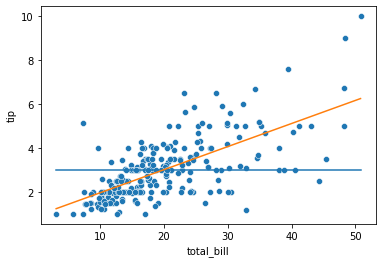

In [8]:
sns.scatterplot(x = "total_bill", y = "tip", data = tips)
sns.lineplot(x = 'total_bill', y = 'baseline', data = tips)
sns.lineplot(x = 'total_bill', y = 'yhat', data = tips)

### Compute the residuals

In [9]:
tips['residual'] = tips['tip'] - tips['yhat']
tips['residual_baseline'] = tips['tip'] - tips['yhat']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,baseline,yhat,residual,residual_baseline
1,16.99,1.01,Female,No,Sun,Dinner,2,2.998279,2.704636,-1.694636,-1.694636
2,10.34,1.66,Male,No,Sun,Dinner,3,2.998279,2.006223,-0.346223,-0.346223
3,21.01,3.50,Male,No,Sun,Dinner,3,2.998279,3.126835,0.373165,0.373165
4,23.68,3.31,Male,No,Sun,Dinner,2,2.998279,3.407250,-0.097250,-0.097250
5,24.59,3.61,Female,No,Sun,Dinner,4,2.998279,3.502822,0.107178,0.107178


### Plot the residuals

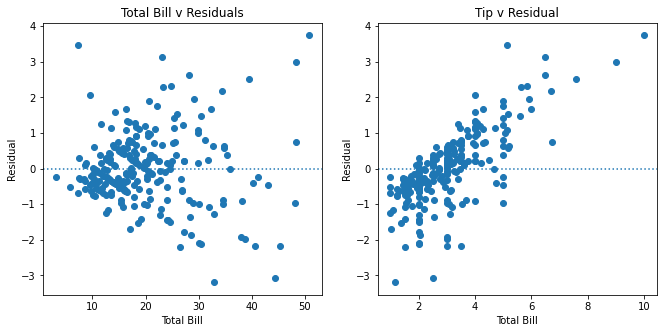

In [10]:
# residual plots 

plt.figure(figsize = (11,5))

plt.subplot(121)
plt.scatter(tips.total_bill, tips.residual_baseline)
plt.axhline(y = 0, ls = ':')
plt.xlabel('Total Bill')
plt.ylabel('Residual')
plt.title('Total Bill v Residuals')

plt.subplot(122)
plt.scatter(tips.tip, tips.residual)
plt.axhline(y = 0, ls = ':')
plt.xlabel('Total Bill')
plt.ylabel('Residual')
plt.title('Tip v Residual');

## Evaluative Metrics

### Sum of Squared Errors (SSE)

In [11]:
# first calculate the square of residuals

tips['residual^2'] = tips.residual**2
tips['residual_baseline^2'] = tips.residual_baseline**2

tips.head()

,total_bill,tip,sex,smoker,day,time,size,baseline,yhat,residual,residual_baseline,residual^2,residual_baseline^2
1,16.99,1.01,Female,No,Sun,Dinner,2,2.998279,2.704636,-1.694636,-1.694636,2.871792,2.871792
2,10.34,1.66,Male,No,Sun,Dinner,3,2.998279,2.006223,-0.346223,-0.346223,0.119870,0.119870
3,21.01,3.50,Male,No,Sun,Dinner,3,2.998279,3.126835,0.373165,0.373165,0.139252,0.139252
4,23.68,3.31,Male,No,Sun,Dinner,2,2.998279,3.407250,-0.097250,-0.097250,0.009458,0.009458
5,24.59,3.61,Female,No,Sun,Dinner,4,2.998279,3.502822,0.107178,0.107178,0.011487,0.011487


In [12]:
SSE = tips['residual^2'].sum()
SSE_baseline = tips['residual_baseline^2'].sum()

print('SSE =', "{:.1f}".format(SSE))
print("SSE Baseline =", "{:.1f}".format(SSE_baseline))

SSE = 252.8
SSE Baseline = 252.8


### Explained Sum of Squares (ESS)

In [13]:
ESS = sum((tips.yhat - tips.tip.mean())**2)

ESS_baseline = sum((tips.baseline - tips.tip.mean())**2)

print('ESS =', "{:.1f}".format(ESS))
print("ESS Baseline =", "{:.1f}".format(ESS_baseline))

ESS = 212.4
ESS Baseline = 0.0


### Total Sum of Squares (TSS)

In [14]:
TSS = ESS + SSE
print('TSS =', "{:.1f}".format(TSS))

TSS = 465.2


### Mean Squared Error (MSE)

In [15]:
MSE = SSE/len(tips)
MSE_baseline = SSE_baseline/len(tips)

print("MSE = ", MSE)
print("MSE baseline = ", MSE_baseline)

MSE =  1.036019442011377
MSE baseline =  1.036019442011377


### Root Mean Squared Error (RMSE)

In [16]:
RMSE = sqrt(MSE)
RMSE_baseline = sqrt(MSE_baseline)

print("RMSE = ", RMSE)
print("RMSE baseline = ", RMSE_baseline)

RMSE =  1.0178504025697377
RMSE baseline =  1.0178504025697377


### Comparing SSE model with baseline

Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [17]:
def evaluate_SSE(SSE, SSE_baseline):
    if SSE < SSE_baseline:
        print("The model performs better than baseline.")
    elif SSE > SSE_baseline:
        print("The model performs worse than baseline.")
    elif SSE == SSE_baseline:
        print("The model performs equally well as baseline.")

In [18]:
evaluate_SSE(SSE, SSE_baseline)

The model performs equally well as baseline.


### Variance Explained in the Model

In [19]:
# Calculate R2
R2 = ESS/TSS
R2

0.4566165863516764

In [20]:
# calculate R2 the easy way:

from sklearn.metrics import r2_score
r2_score(tips.tip, tips.yhat)

0.45661658635167657

In [21]:
tips

,total_bill,tip,sex,smoker,day,time,size,baseline,yhat,residual,residual_baseline,residual^2,residual_baseline^2
1,16.99,1.01,Female,No,Sun,Dinner,2,2.998279,2.704636,-1.694636,-1.694636,2.871792,2.871792
2,10.34,1.66,Male,No,Sun,Dinner,3,2.998279,2.006223,-0.346223,-0.346223,0.119870,0.119870
3,21.01,3.50,Male,No,Sun,Dinner,3,2.998279,3.126835,0.373165,0.373165,0.139252,0.139252
4,23.68,3.31,Male,No,Sun,Dinner,2,2.998279,3.407250,-0.097250,-0.097250,0.009458,0.009458
5,24.59,3.61,Female,No,Sun,Dinner,4,2.998279,3.502822,0.107178,0.107178,0.011487,0.011487
...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,29.03,5.92,Male,No,Sat,Dinner,3,2.998279,3.969131,1.950869,1.950869,3.805888,3.805888
241,27.18,2.00,Female,Yes,Sat,Dinner,2,2.998279,3.774836,-1.774836,-1.774836,3.150043,3.150043
242,22.67,2.00,Male,Yes,Sat,Dinner,2,2.998279,3.301175,-1.301175,-1.301175,1.693057,1.693057
243,17.82,1.75,Male,No,Sat,Dinner,2,2.998279,2.791807,-1.041807,-1.041807,1.085361,1.085361


### 

### Evaluate Functions

In [22]:
from evaluate import plot_residuals
from evaluate import regression_errors
from evaluate import baseline_mean_errors
from evaluate import better_than_baseline

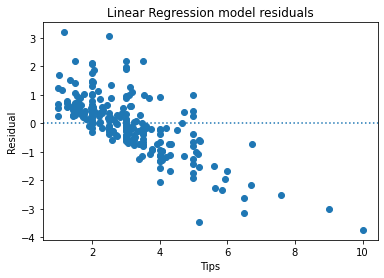

In [23]:
plot_residuals(tips.tip, tips.yhat)

In [24]:
regression_errors(tips.tip, tips.yhat)

ESS 212.42373319840434
MSE 1.036019442011377
SSE 252.788743850776
TSS 465.21247704918034
RMSE 1.0178504025697377


In [25]:
baseline_mean_errors(tips.tip)

MSE baseline 1.906608512496641
SSE baseline 465.2124770491804
RMSE baseline 1.3807999538298954


In [26]:
better_than_baseline(tips.tip, tips.yhat)

The mode performs better than baseline.


## MPG Dataset

Load the mpg dataset and fit a model that predicts highway mileage based on engine displacement. Take a look at all the regression evaluation metrics, and determine whether this model is better than the baseline model. Use the functions from your evaluate.py to help accomplish this.

In [27]:
mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


<AxesSubplot:xlabel='displ', ylabel='hwy'>

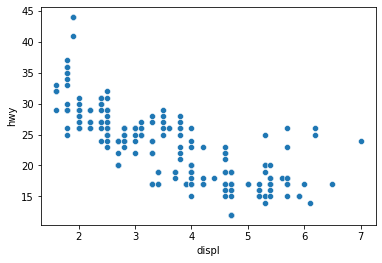

In [35]:
sns.scatterplot(x = mpg.displ, y = mpg.hwy)

In [29]:
lm_2 = LinearRegression(normalize=True)

In [31]:
lm_2.fit(mpg[['displ']], mpg.hwy)

yhat = lm_2.predict(mpg[['displ']])

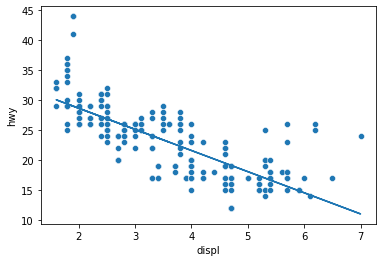

In [37]:
sns.scatterplot(x = mpg.displ, y = mpg.hwy)
plt.plot(mpg.displ, yhat)

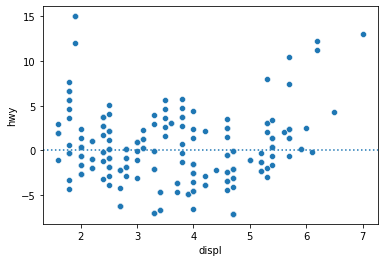

In [41]:
sns.scatterplot(x = mpg.displ, y  = (mpg.hwy - yhat))
plt.axhline(0, ls = ':')

In [45]:
regression_errors(mpg.hwy, yhat)

ESS 4847.833384166931
MSE 14.589012858954984
SSE 3413.829008995466
TSS 8261.662393162398
RMSE 3.819556631201452


In [46]:
better_than_baseline(mpg.hwy, yhat)

The mode performs better than baseline.
